## Predicting survival in Titanic Dataset
1. Importing data and basic Analysis
2. Missing value imputations
3. Feature Engineering
4. Applying various classification models
5. Going through each classification model

In [1]:
## Following 3 statements set the path for accessing various data/program files to be used in this notebook
import os
#local_path = '/Kaggle_Competition/Titanic'
#os.chdir(local_path)

## Following two statements will allow to display multiple variables one after the other without using print statement
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [62]:
train = pd.read_csv('train.csv') #read the data into train_df dataframe
test = pd.read_csv('test.csv')  #read test data
combine =train.append(test, ignore_index=True) #adding train and test data..

## Variable meaning

**survival**---Survival   0 = No, 1 = Yes

**pclass**---Ticket class  1 = 1st, 2 = 2nd, 3 = 3rd

**sex**---Sex   Male, Female

**Age**---Age in years

**sibsp**---#of siblings / spouses aboard the Titanic

**parch**---#of parents / children aboard the Titanic

**ticket**---Ticket number

**fare**---Passenger fare

**cabin**---Cabin number

**embarked**---Port of Embarkation   C = Cherbourg, Q = Queenstown, S = Southampton

In [63]:
combine.shape #checking the shape of the combined data

(1309, 12)

In [64]:
train.info() #gives the number of records, are null-characters present, type of column
print('_'*40)  #a break for displaying separate train and test data
test.info() #gives the number of records, are null-characters present, type of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [65]:
train.describe(include='all')
#view the basic summary of each dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lines, Miss. Mary Conover",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Missing values imputation

In [66]:
#checking the number of NA values in each attribute
combine.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

#### We can work on imputing Embarked, Fare, Age

The remaining attributes Cabin contains 1014 NA values which is more than 76% records are NA. So we remove that attribute.

The Survival is Y-attribute and we can remove the records containing NA or impute them

In [67]:
# Fill the 2 missing entries for Embarked with mode of Embarked in the filled up entries
# find mode first by excluding null value rows
freq_port = train.Embarked.dropna().mode()[0]

#fill the missing values with mode
combine['Embarked'] = combine['Embarked'].fillna(freq_port)

# Convert Embarked to numeric values
combine['Embarked'] = combine['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#### Replacing NA values in Fare

In [68]:
#replace single missing fare value in test data with median fare
combine['Fare'].fillna(combine['Fare'].dropna().median(), inplace=True)

#### Replacing NA values in Age

In [69]:
#filling missing values of age
combine.Sex=combine['Sex'].map( {'male': 1, 'female': 0} ).astype(int)
#changing male and female to 1 and zero respectively

bb = [combine]

# Fill the missing age values with median of combination of Pclass and Sex, as age has correlation with these two attributes
guess_ages = np.zeros((2,3))

# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.
for dataset in bb:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

### Feature Engineering

#### The name of each person is not important but the title they carry might be of importance


In [70]:
combine['Title'] = combine.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#creating a new attribute which stores the prefix of names
#this is done using regular expression which goes through every row of NAME column and extracts the second word in 
#the name
title_sex = pd.crosstab(combine['Title'], combine['Sex'])
title_sex.head()
#this will print the title as index and the factors present in SEX
#the sex attribute has only two factors and hence the output is the count of each title for each sex

Sex,0,1
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0


##### Instead of having many classes for just title. Lets combine all scarce titles with rare

Text(0.5,0,'Prefix')

Text(0,0.5,'Number of People survived')

Text(0.5,0,'Prefix')

Text(0,0.5,'Count')

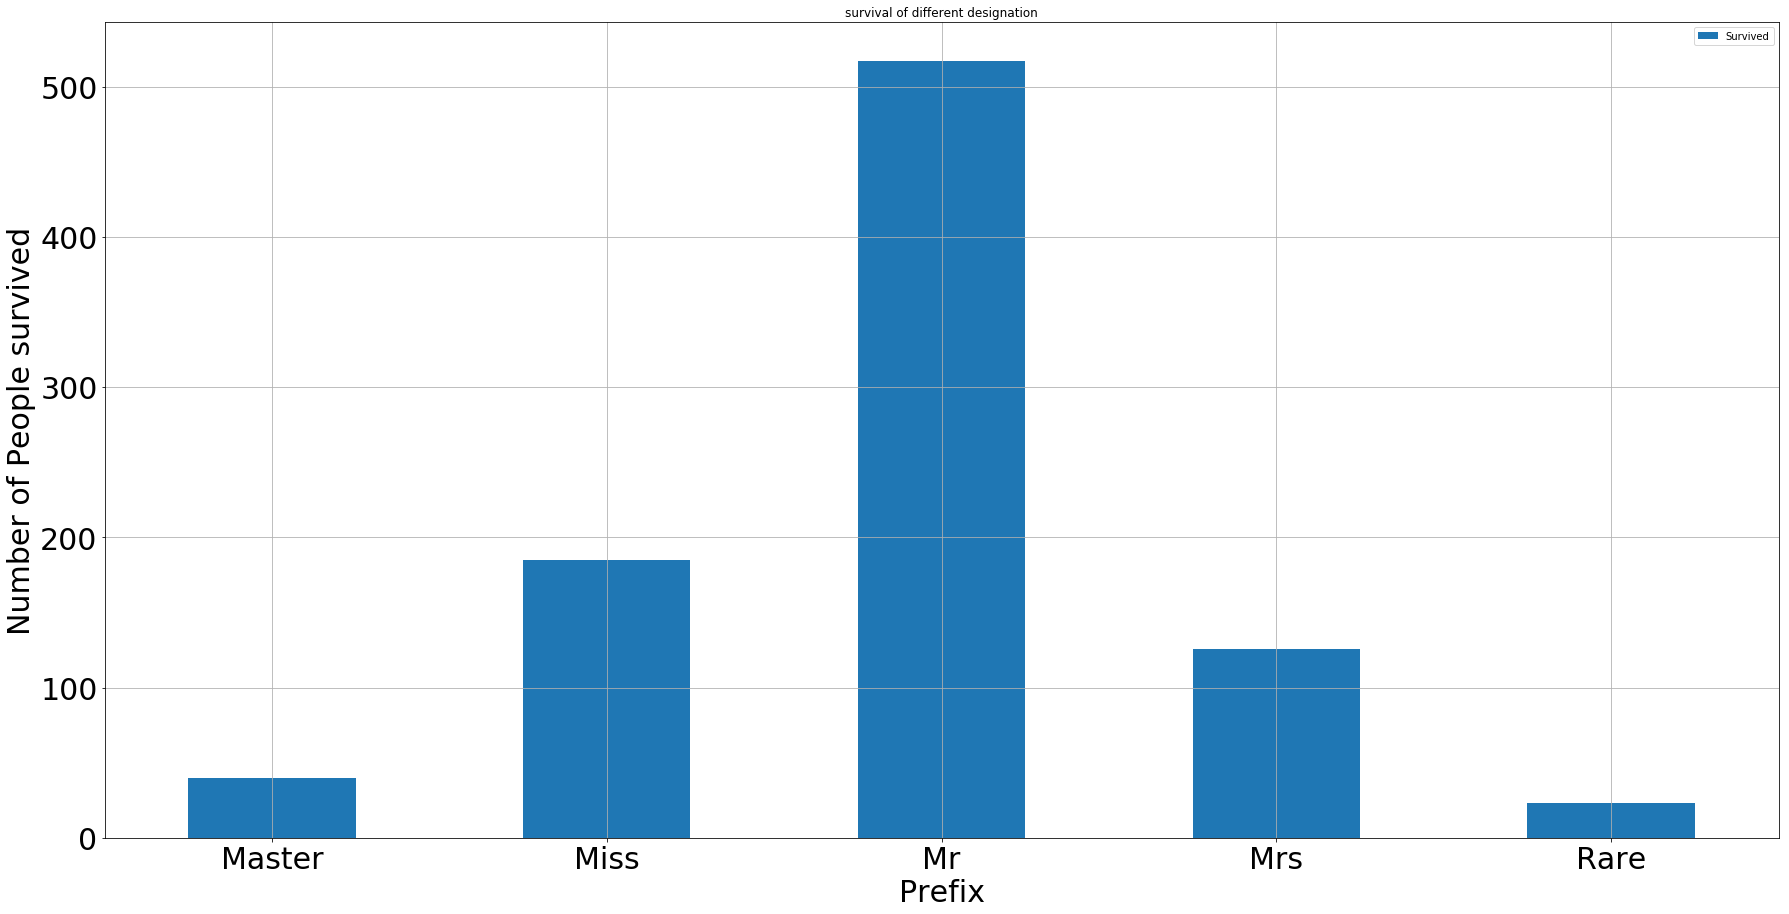

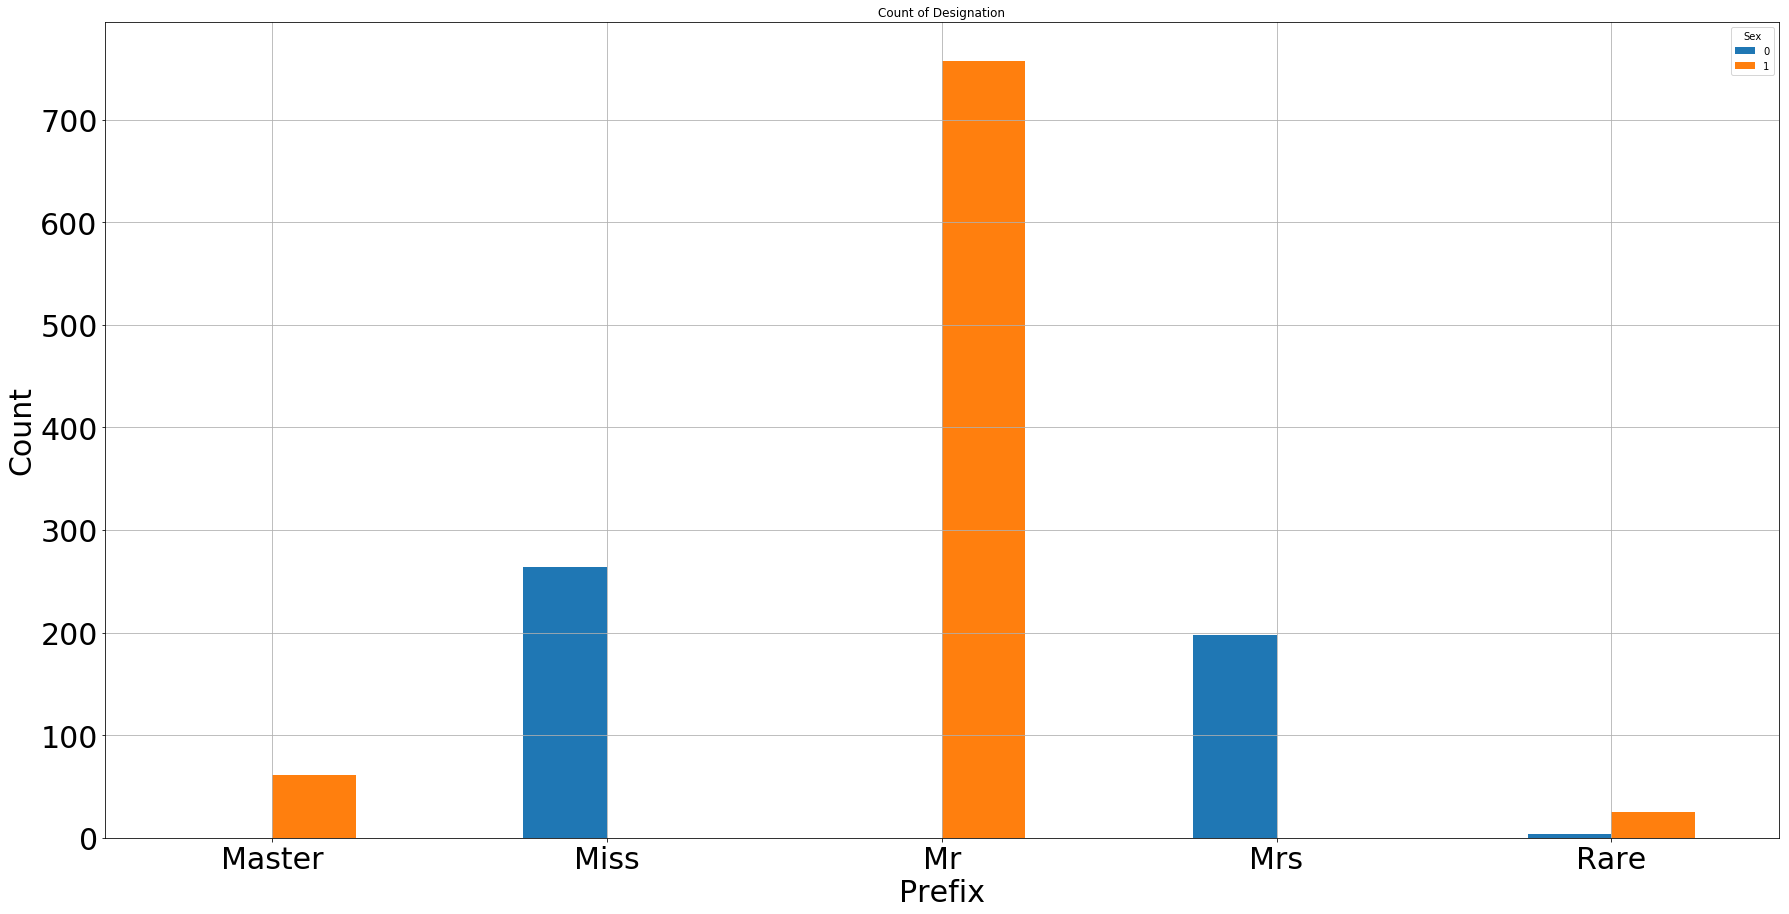

In [71]:
#### We can replace many titles with a more common name or classify them as Rare.
combine['Title'] = combine['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#replacing the above mentioned titles with rare

combine['Title'] = combine['Title'].replace('Mlle', 'Miss')
#replacing mlle with miss
combine['Title'] = combine['Title'].replace('Ms', 'Miss')
#replacing Ms with miss
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')
#replacing Mme with Mrs



title_survived = combine[['Title', 'Survived']].groupby(['Title'], as_index=False).count()
#printing the number of survived people containing different prefix 
title_survived.plot(kind='bar',title='survival of different designation',x=title_survived.Title,grid=True,figsize=(30,15),use_index=True,legend='True',fontsize = 30,rot='horizontal',mark_right=True,table=False)
plt.xlabel('Prefix',fontsize=30)
plt.ylabel('Number of People survived',fontsize=30)


title_sex = pd.crosstab(combine['Title'], combine['Sex'])
#printing number of people having designation across differnt sex
title_sex.plot(kind='bar',title='Count of Designation',grid=True,figsize=(30,15),use_index=True,legend='True',fontsize = 30,rot='horizontal',mark_right=True,table=False)
plt.xlabel('Prefix',fontsize=30)
plt.ylabel('Count',fontsize=30)

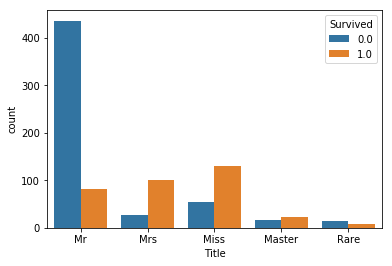

In [72]:
sns.countplot(x='Title', data=combine, hue='Survived')
#the number of persons having title Mrs were saved more than 

,FamilySize,Survived
0,1,163.0
1,2,89.0
2,3,59.0
3,4,21.0
6,7,4.0
4,5,3.0
5,6,3.0
7,8,0.0
8,11,0.0


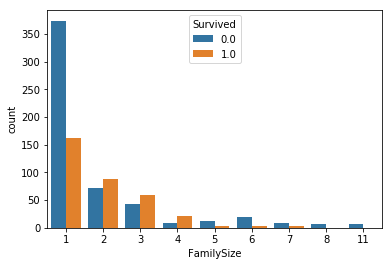

In [73]:
# Create a new variable family size with all the family members
combine['FamilySize'] = combine['SibSp'] + combine['Parch'] + 1
#adding one so as to not get zero

#if we groupby family size to survived it can be infered that 
combine[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).sum().sort_values(by='Survived', ascending=False)
sns.countplot(x='FamilySize', data=combine,hue='Survived')

In [78]:
#converting categorical attributes to ordinal will help the model understand that the title the passenger has
#will effect their survival..
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#creating the respective number for each class

combine['Title'] = combine['Title'].map(title_mapping)
#changing the names of prefix into ordinal by mapping with the title_mapping dictionary

combine['Title'] = combine.fillna(0)
#replacing the NA values with zero

Text(0.5,0,'Number of Pepole per PClass')

Text(0,0.5,'Place of boarding')

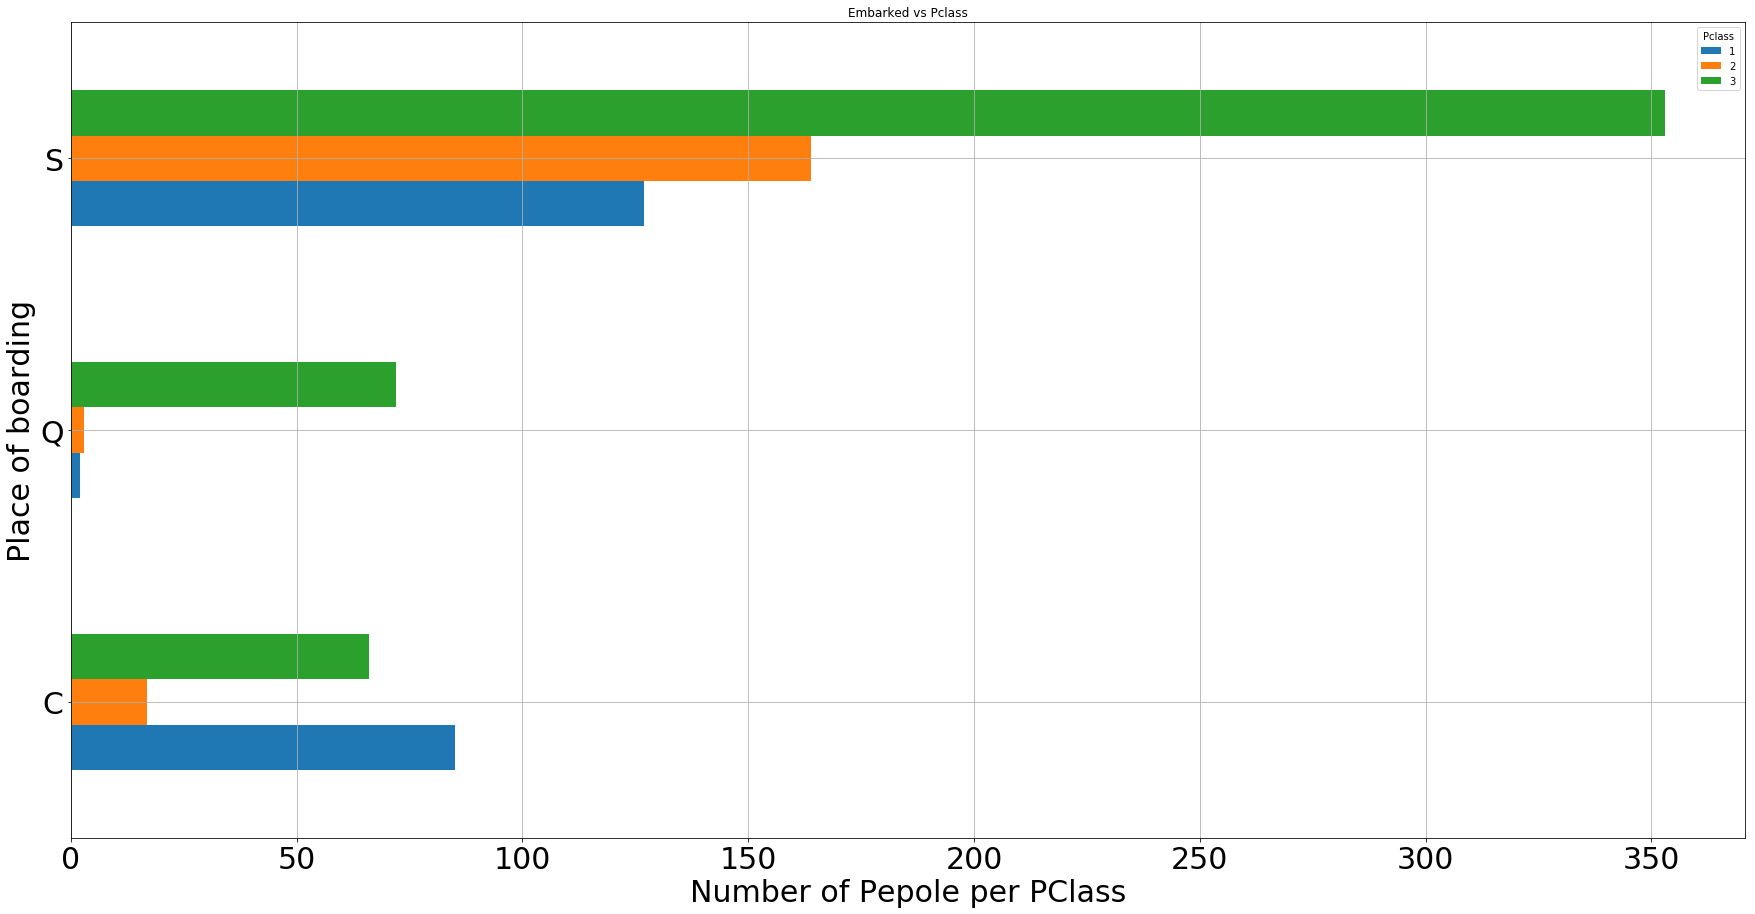

In [79]:
# lets check the count of type of embarked with Pclass 
class_embarked = pd.crosstab(train.Embarked,train.Pclass)
class_embarked.plot(kind='barh',title='Embarked vs Pclass',grid=True,figsize=(30,15),use_index=True,legend='True',fontsize = 30,rot='horizontal',mark_right=True,table=False)
plt.xlabel('Number of Pepole per PClass',fontsize=30)
plt.ylabel('Place of boarding',fontsize=30)

### Insights from Plot
It is seen that most number of people baorded in Southampton

The first class people boarded more in Southampton and then in Cherbourg

Almost same number of people have boarded in 3rd class in Queenstown and Cherbourg

#### Lets create a gbm to predict the NA values in Survived.

This can be done by taking records containing NA values as test data and the remining as train data

Building a model using train data and then predict on test data.

We cannot verify the accuracy on test data hence we will choose parameters that gives high accuracy with train data

In [83]:
combine =combine.drop([ "PassengerId", "Name", "Ticket", "Cabin"], axis=1)

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Title', 'FamilySize'],
      dtype='object')

In [84]:
#splitting the data set into train and test where train is the values contining in survived
combine.Title = combine.Title.astype('int32')
gbm_train = combine[pd.notnull(combine.Survived)]
gbm_train_x = gbm_train.drop('Survived',1)
gbm_train_y = gbm_train['Survived']


#test contains NA values in survived
gbm_test = combine[pd.isnull(combine.Survived)]
gbm_test_x = gbm_test.drop('Survived',1)

from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV
import xgboost


#lets create grid search for best values of parameters and then use it for model building
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
#max_depth is the number of nodes that the tree has to go

ind_params = {'learning_rate': 0.1, 'n_estimators': 500, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
#learning rate is the proportion at which the error must be changed
#number of trees to build: n_estimators
#subsample is to how much propotion of data should be taken for building each tree
#objective is a binary classification i.e survived or not


#giving the grid search with XGBclassifier and al the parameters
optimized_GBM = GridSearchCV(XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
#scoring is the metric which should be used for error reduction
#cv=5 is the number of train-test splits

#fitting the model with the parameters
%time optimized_GBM.fit(gbm_train_x, gbm_train_y)

#printing the best combination of parameters
optimized_GBM.grid_scores_

Wall time: 38.4 s


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

[mean: 0.84063, std: 0.02147, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.83165, std: 0.02075, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.84512, std: 0.01883, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.82155, std: 0.02058, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.83165, std: 0.02298, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.84400, std: 0.02047, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.81369, std: 0.02869, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.82267, std: 0.01370, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.84736, std: 0.02060, params: {'max_depth': 7, 'min_child_weight': 5}]

from the above the mean is highest in **max_depth=5, min_child=5**.

Hence we will take these parameters for model building 

I have only used max_depth, min_child for tuning. One can add other parameters like learning_rateetc

In [46]:
xgdmat = xgboost.DMatrix(gbm_train_x, gbm_train_y) # Create our DMatrix to make XGBoost more efficient


# Grid Search CV optimized settings
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':5, 'min_child_weight':5} 


#training the xgboost model with 500 iterations
gb_model = xgboost.train(our_params, xgdmat, num_boost_round = 500)

In [47]:
#converting the test data into matrix format
testdmat = xgboost.DMatrix(gbm_test_x)

#predicting on test matrix
y_pred = gb_model.predict(testdmat)

#the predictions are going to be in probability so we have to convert those probability into binary
#hence I have took values greater than 0.5 as 1 and less than 0.5 as 0
#one can play eith the probability threshold for changing precision and recall
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
gbm_test_x['Survived'] = y_pred

#combining the train and test data
#now the combine dataframe doesnot have NA values in survived column
combine = pd.concat([gbm_train,gbm_test_x], axis=0)

#### Converting the datatype into numeric and categorical and removing unnecessary attributes

In [55]:
categoricalfeaturenames= ['Embarked','FamilySize','IsAlone','Parch','Pclass','Sex','SibSp','Survived']
numericalfeaturenames = ['Age','AgeXClass','Fare','Title']
#dropfeatures = ['Age_bande','Age_band']

In [58]:
#convert the attributes listed above to categorical form
for var in categoricalfeaturenames:
    combine[var] = combine[var].astype("category")
    
    
for var in numericalfeaturenames:
    combine[var] = combine[var].astype("float")    
    
#combine.drop(dropfeatures,1,inplace=True)

In [59]:
#splitting the dataframe into train and test
#the first 891 records are for train and the last 418 records are for test
train_df =combine.head(891)
test_df = combine.tail(418)
test_df = test_df.drop(["Survived"], axis=1)

In [60]:
from sklearn.cross_validation import cross_val_score
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]

name=[]
accuracy = []
classifiers1 = [LogisticRegression(),
               LinearSVC(),
               KNeighborsClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(), 
                Perceptron(),
               MLPClassifier(),
               GaussianNB(),
               SGDClassifier(), 
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(), 
               ]



for i in classifiers1:
    scores = cross_val_score(i, X, y, cv=10, scoring='accuracy')
    name.append(i.__class__.__name__)
    accuracy.append(scores.mean())
    print("mean accuracy for {} is:".format(i.__class__.__name__), scores.mean())

mean accuracy for LogisticRegression is: 0.7946266031097492
mean accuracy for LinearSVC is: 0.5818911020315515
mean accuracy for KNeighborsClassifier is: 0.7185339348541595
mean accuracy for DecisionTreeClassifier is: 0.770095619112473
mean accuracy for RandomForestClassifier is: 0.8081852230166836
mean accuracy for SVC is: 0.695847520145273
mean accuracy for Perceptron is: 0.5119390534559074
mean accuracy for MLPClassifier is: 0.6893567699466575
mean accuracy for GaussianNB is: 0.778086482805584
mean accuracy for SGDClassifier is: 0.5915412552491204
mean accuracy for AdaBoostClassifier is: 0.8171368176143456
mean accuracy for GradientBoostingClassifier is: 0.830633015548746
mean accuracy for LinearDiscriminantAnalysis is: 0.794639087504256
mean accuracy for QuadraticDiscriminantAnalysis is: 0.6265333106344342


Text(0.5,0,'Model')

Text(0,0.5,'Accuracy')

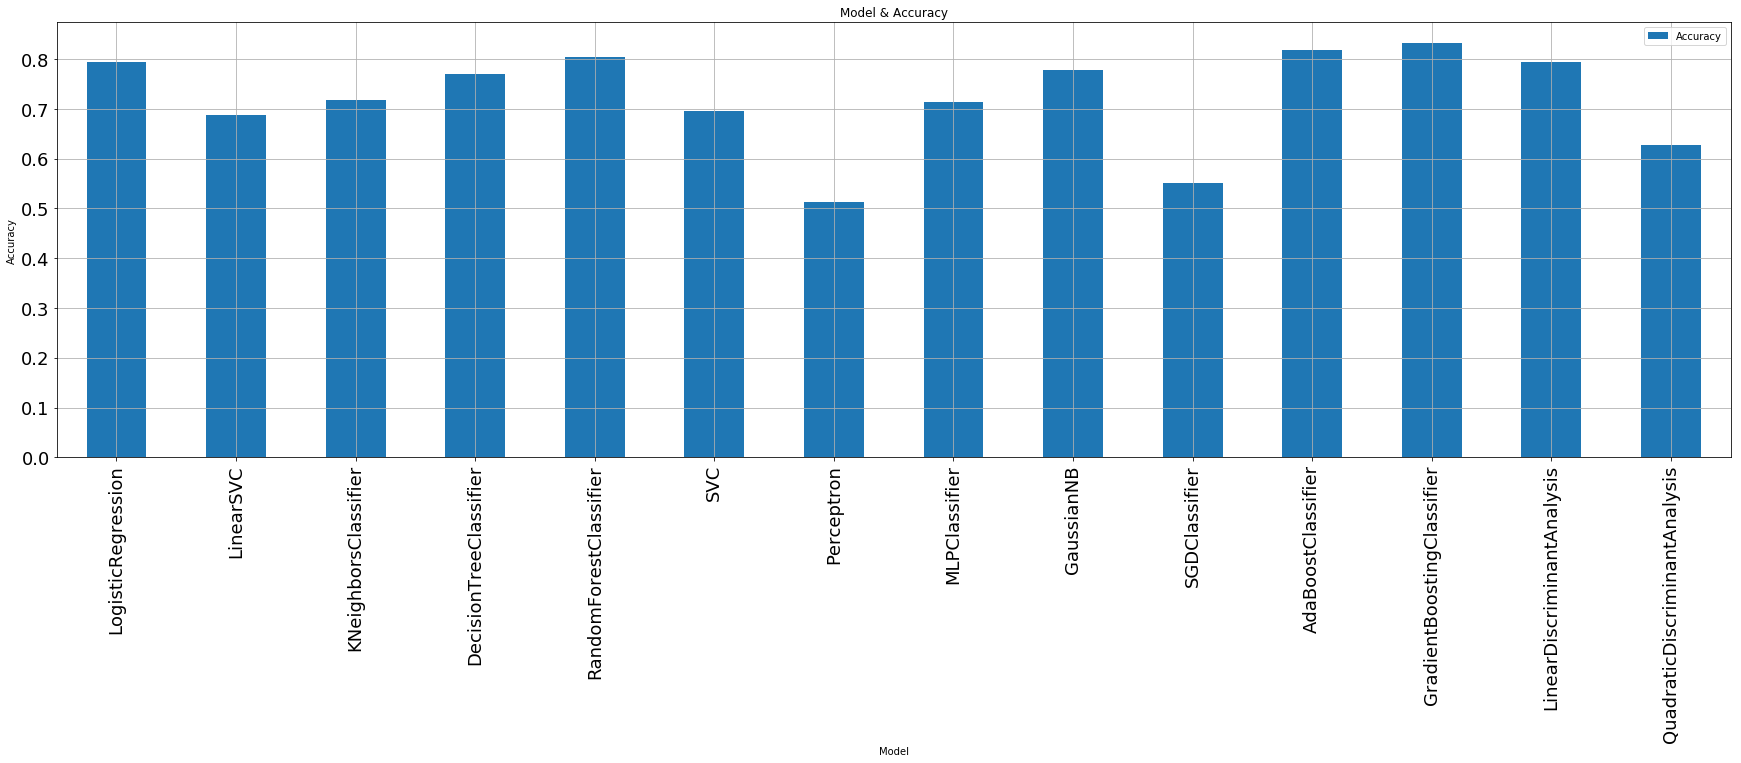

In [52]:
accuracy_df = pd.DataFrame()
accuracy_df['name']=name
accuracy_df['accuracy']=accuracy

accuracy_df.plot(kind='bar',x='name',y='accuracy',title='Model & Accuracy',figsize=(30,8),fontsize = 18,grid=True,rot='vertical',label='Accuracy',mark_right=True,table=False)
plt.xlabel('Model')
plt.ylabel('Accuracy')

### Lets breakdown and code each model and its evaluation

In [16]:
# Split the training data set into training(85%) and test(15%) data sets
from sklearn.model_selection import train_test_split
X = train_df.drop('Survived',1)
y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)
print('Size of training data set', y_train.count())
print('Size of test data set', y_test.count())
X.head()

NameError: name 'train_df' is not defined

In [92]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
acc_linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc_test = round(linear_svc.score(X_test, y_test) * 100, 2)
#Print Confusion matrix for training data
y_pred_linear_svc_train = linear_svc.predict(X_train)
df_confusion = metrics.confusion_matrix(y_train, y_pred_linear_svc_train)
df_confusion

#Print Confusion matrix for test data
y_pred_linear_svc_test = linear_svc.predict(X_test)
df_confusion = metrics.confusion_matrix(y_test, y_pred_linear_svc_test)
df_confusion

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

66.58

64.93

In [94]:
# K-nearest Neighborhood 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#Print Confusion matrix for training data
y_pred_knn_train = knn.predict(X_train)
df_confusion = metrics.confusion_matrix(y_train, y_pred_knn_train)
df_confusion

#Print Confusion matrix for test data
y_pred_knn_test = knn.predict(X_test)
df_confusion = metrics.confusion_matrix(y_test, y_pred_knn_test)
df_confusion

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

80.85

74.63

In [ ]:
# Support Vector Machines
svc = SVC(kernel='poly',degree=5,C=400)
#svc = SVC(kernel='poly', C=1e05, degree=8, random_state=75)
svc.fit(X_train, y_train)
y_pred_svc_train = svc.predict(X_train)
y_pred_svc_test = svc.predict(X_test)
#Print Confusion matrix for training data
df_confusion = metrics.confusion_matrix(y_train, y_pred_svc_train)
df_confusion

#Print Confusion matrix for test data
df_confusion = metrics.confusion_matrix(y_test, y_pred_svc_test)
df_confusion

In [236]:
# Decision Tree
#decision_tree = DecisionTreeClassifier(max_depth=7, min_samples_split=6, random_state=100)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt_train = decision_tree.predict(X_train)
y_pred_dt_test = decision_tree.predict(X_test)
#Print Confusion matrix for training data
df_confusion = metrics.confusion_matrix(y_train, y_pred_dt_train)
df_confusion

#Print Confusion matrix for test data
df_confusion = metrics.confusion_matrix(y_test, y_pred_dt_test)
df_confusion

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

95.379999999999995

83.579999999999998

In [238]:
# Random Forest
#random_forest = RandomForestClassifier(n_estimators=300, max_depth=9, min_samples_split=4, random_state=125)
random_forest = RandomForestClassifier(n_estimators=300,max_depth=10,random_state=25)
random_forest.fit(X_train, y_train)
y_pred_rf_train = random_forest.predict(X_train)
y_pred_rf_test = random_forest.predict(X_test)

#Print Confusion matrix for training data
df_confusion = metrics.confusion_matrix(y_train, y_pred_rf_train)
df_confusion

#Print Confusion matrix for test data
df_confusion = metrics.confusion_matrix(y_test, y_pred_rf_test)
df_confusion

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=25,
            verbose=0, warm_start=False)

93.260000000000005

84.329999999999998

In [180]:
X_test_submission  = test_df.drop(["PassengerId","SibSp","Parch","IsAlone"], axis=1).copy()
Y_pred_linear_svc = linear_svc.predict(X_test_submission)
Y_pred_knn = knn.predict(X_test_submission)
Y_pred_svc = svc.predict(X_test_submission)
Y_pred_dt = decision_tree.predict(X_test_submission)
Y_pred_random_forest = random_forest.predict(X_test_submission)

Y_pred_linear_svc.mean()
Y_pred_knn.mean()
Y_pred_svc.mean()
Y_pred_dt.mean()
Y_pred_random_forest.mean()

0.39712918660287083

0.38038277511961721

0.32535885167464113

0.37799043062200954

0.33971291866028708

In [182]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_dt
    })
submission.to_csv('final_submission.csv', index=False)